# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘AppointmentDay’ tells us on what day the patient are expected to visit the hospital
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
‘Hipertension’, ‘Diabetes’, ‘Alcoholism’, ‘Handcap’ indicates the patients' current health issues 		
‘No-show’ column: ‘No’ indicates the patient showed up to their appointment, and ‘Yes’ indicates they did not show up.

### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

We will take a look at the number of patients that showed up and those that didn't. We will also determine if any the following is an important factor that determines the if patients would show up or not:

i) Gender
ii) ScheduledDay
ii) AppointmentDay
iv) Age
v) Neighbourhood
vi) Scholarship
vii) Health issues
viii) SMS_received

In [1]:
# Import statements for all of the packages that you

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# check the column names and few values

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# inspect data types and number of values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check number of columns and rows

df.shape

(110527, 14)

In [5]:
# check for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# check for dupliacte values

df.duplicated().sum()

0

In [7]:
# check for possible description of columns in integers

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

#### Things to note from the the general properties of the data
1. Some columns are incorrectly spelt
2. Some columns have the wrong data type or format
3. There is a patient with an age of -1
4. One of the health issues has other values other than 0 = No, 1 = Yes

In [8]:
# rename the columns to appropriate spellings 
# set them to lower case

df = df.rename({'Hipertension': 'Hypertension','Neighbourhood': 'Neighborhood', 'PatientId': 'Patient_Id', 'AppointmentID': 'Appointment_ID', 'ScheduledDay': 'Scheduled_Day', 'AppointmentDay': 'Appointment_Day', 'Handcap': 'Handicap'}, axis='columns')
df = df.rename(columns=lambda x: x.lower().replace("-", "_"))

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# split the dates to the correct date format
# remove the time stamp and the alphabets in between to reveal the dates

df['scheduled_day'] = df['scheduled_day'].str.strip('Z')
df['scheduled_day'] = df['scheduled_day'].str.split('T', n=1, expand=True)

df['appointment_day'] = df['appointment_day'].str.strip('Z')
df['appointment_day'] = df['appointment_day'].str.split('T', n=2, expand=True)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# from the .describe() function, the age shows a minimum value of -1 which is technically impossibe

df[df['age']== -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# delete the entire information of the patient with age of -1

df = df.drop(labels=99832, axis=0)

df.shape

(110526, 14)

In [12]:
# correct the data type of the dates and ID

df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['patient_id'] = df['patient_id'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110526 non-null int64
appointment_id     110526 non-null int64
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighborhood       110526 non-null object
scholarship        110526 non-null int64
hypertension       110526 non-null int64
diabetes           110526 non-null int64
alcoholism         110526 non-null int64
handicap           110526 non-null int64
sms_received       110526 non-null int64
no_show            110526 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


In [13]:
# the handicap data shows that the patients are being rated from 0 to 4 unlike other health conditions rated 0 or 1. 

df['handicap'].groupby(df['handicap']).count()

handicap
0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [14]:
# replace values other than 0 to 1 in the handicap column

df['handicap'] = df['handicap'].replace([1,2,3,4], 1)

df['handicap'].groupby(df['handicap']).count()

handicap
0    108285
1      2241
Name: handicap, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

We will take a look at the number of patients that showed up and those that didn't. We will also determine if any the following is an important factor that determines the if patients would show up or not:		
1. gender	
2. scheduled_day	
3. appointment_day	
4. age group
5. neighborhood	
6. scholarship	
7. health issues
8. sms_received	


> #### NB: For all exploratory analysis: 
'0' = No; '1' = Yes 

> Green bar = No. of patients that showed up; Yellow bar = No. of patients that didn't show up

### Total number of patients that showed up and those that didn't

In [15]:
# display the total number of appointment decisions

df['no_show'].count()

110526

no_show
No     88207
Yes    22319
Name: no_show, dtype: int64

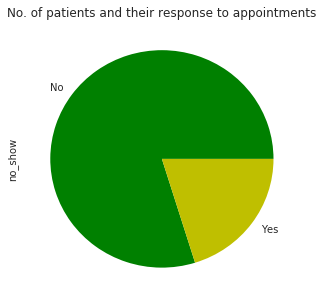

In [16]:
# categorize no_show accrording to those that showed up and those that didn't

df['no_show'].groupby(df['no_show']).count().plot.pie(figsize=(5,5), colors = ['g', 'y'])
plt.title('No. of patients and their response to appointments')

df['no_show'].groupby(df['no_show']).count()


### Total number of patients that showed up and those that didn't according to gender

gender
F    71839
M    38687
Name: no_show, dtype: int64

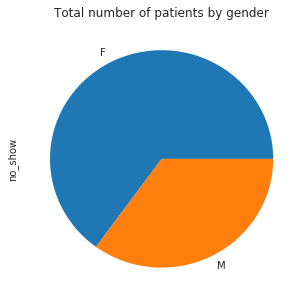

In [17]:
# categorize the total number of patients by gender

df.groupby(['gender']).count()['no_show'].plot.pie(figsize=(5,5))
plt.title('Total number of patients by gender')
df.groupby(['gender']).count()['no_show']

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: patient_id, dtype: int64

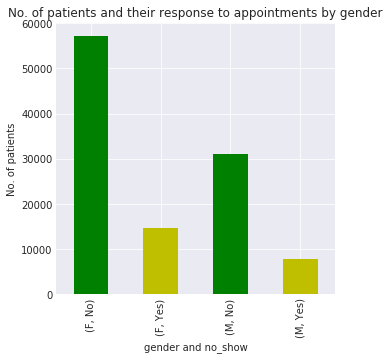

In [18]:
# categorize gender accrording to those that showed up and those that didn't

dfx = df.groupby(['gender', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*2, figsize=(5,5))
plt.xlabel('gender and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by gender')

df.groupby(['gender', 'no_show']).count()['patient_id']


### Total number of patients that showed up and those that didn't according to scheduled day

In [19]:
# display the top 10 scheduled dates

df.groupby(['scheduled_day']).count()['patient_id'].sort_values(ascending=False).head(10)

scheduled_day
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
2016-05-09    3969
2016-04-29    3778
2016-05-11    3576
2016-05-04    3567
2016-05-30    3452
Name: patient_id, dtype: int64

scheduled_n
Tuesday      26168
Wednesday    24262
Monday       23084
Friday       18915
Thursday     18073
Saturday        24
Name: patient_id, dtype: int64

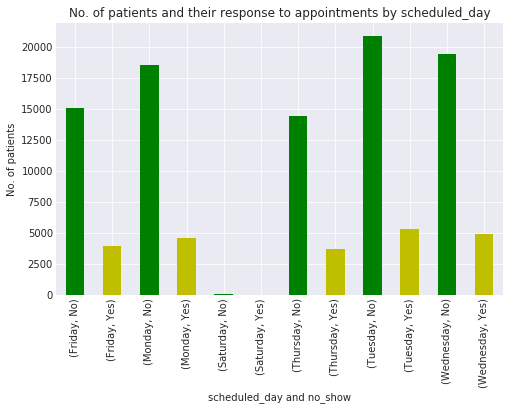

In [20]:
# create a new column from the schedule day and convert the values into days of the week

df['scheduled_n'] = df['scheduled_day'].dt.day_name()

# categorize the days of the week accrording to those that showed up and those that didn't

dfx = df.groupby(['scheduled_n', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*6, figsize=(8,5))
plt.xlabel('scheduled_day and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by scheduled_day')

df.groupby(['scheduled_n']).count()['patient_id'].sort_values(ascending=False)


### Total number of patients that showed up and those that didn't according to appointment day

In [21]:
# display the top 10 appointment dates

df.groupby(['appointment_day']).count()['patient_id'].head(10)

appointment_day
2016-04-29    3235
2016-05-02    4376
2016-05-03    4256
2016-05-04    4168
2016-05-05    4273
2016-05-06    3879
2016-05-09    4520
2016-05-10    4308
2016-05-11    4474
2016-05-12    4394
Name: patient_id, dtype: int64

appointment_n
Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: patient_id, dtype: int64

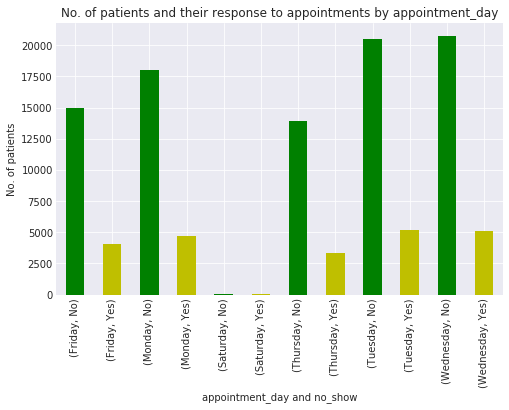

In [22]:
# create a new column and convert the dates into days of the week

df['appointment_n'] = df['appointment_day'].dt.day_name()

# categorize the days of the week accrording to those that showed up and those that didn't

dfx = df.groupby(['appointment_n', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*6, figsize=(8,5))
plt.xlabel('appointment_day and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by appointment_day')

df.groupby(['appointment_n']).count()['patient_id'].sort_values(ascending=False)


### Comparing scheduled day and appointment day

In [23]:
# display the number of patients and the days they scheduled their appointment

df.groupby(['scheduled_n']).count()['patient_id']

scheduled_n
Friday       18915
Monday       23084
Saturday        24
Thursday     18073
Tuesday      26168
Wednesday    24262
Name: patient_id, dtype: int64

In [24]:
# display the number of patients and the days they chose for their appointment

df.groupby(['appointment_n']).count()['patient_id']

appointment_n
Friday       19019
Monday       22714
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: patient_id, dtype: int64

Text(0,0.5,'Number of patients')

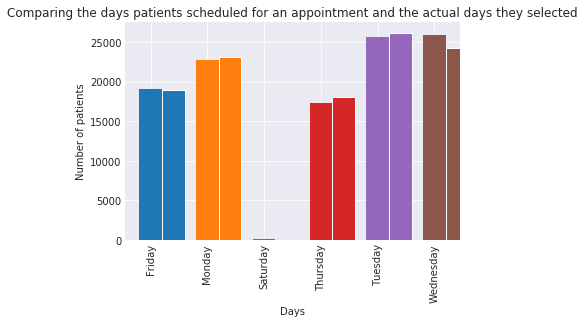

In [25]:
# create a plot comparing the number of patients that scheduled on a particular day and the appointment selected for those days

df.groupby(['scheduled_n']).count()['patient_id'].plot(kind='bar', position=-0.5, width=0.4, edgecolor=['white']*7)
df.groupby(['appointment_n']).count()['patient_id'].plot(kind='bar', position=0.5, width=0.4)
plt.title('Comparing the days patients scheduled for an appointment and the actual days they selected')
plt.xlabel('Days')
plt.ylabel('Number of patients')


### Total number of patients that showed up and those that didn't according to age group

In [26]:
# display total number of patients by their age, top 5

df.groupby(['age']).count()['patient_id'].sort_values(ascending=False).head(5)

age
0     3539
1     2273
52    1746
49    1652
53    1651
Name: patient_id, dtype: int64

In [27]:
# display total number of patients by their age, bottom 5

df.groupby(['age']).count()['patient_id'].sort_values(ascending=False).tail(5)

age
98     6
115    5
100    4
102    2
99     1
Name: patient_id, dtype: int64

In [28]:
# write a fuction that creates a new column that allows the ages of all the patients to be categorized by age brackets

def group(age):
    if age <= 1:
        age = 'infant'
    elif 2 <= age <=4:
        age = 'toddler'
    elif 5 <= age <=12:
        age = 'child'
    elif 13 <= age <=19:
        age = 'teen'
    elif 20 <= age <=39:
        age = 'adult'
    elif 40 <= age <=64:
        age = 'middle_age'
    elif age >= 65:
        age = 'old_age'
    return age
df['age_bracket'] = df['age'].apply(group)

df.groupby(['age_bracket']).count()['patient_id'].sum()

110526

Text(0,0.5,'Total number of patients')

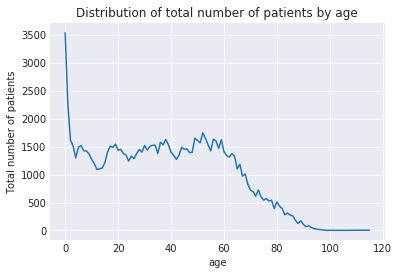

In [29]:
# show the distribution of the total number of patients by age

df.groupby(['age']).count()['patient_id'].plot.line()
plt.title('Distribution of total number of patients by age')
plt.ylabel('Total number of patients')

Text(0,0.5,'Total number of patients')

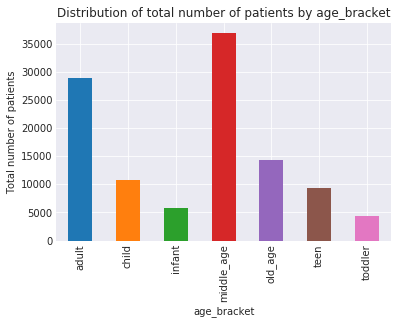

In [30]:
# show the distribution of the total number of patients by age brackets

df.groupby(['age_bracket']).count()['patient_id'].plot.bar()
plt.title('Distribution of total number of patients by age_bracket')
plt.ylabel('Total number of patients')

age_bracket
middle_age    36843
adult         28870
old_age       14402
child         10794
teen           9375
infant         5812
toddler        4430
Name: patient_id, dtype: int64

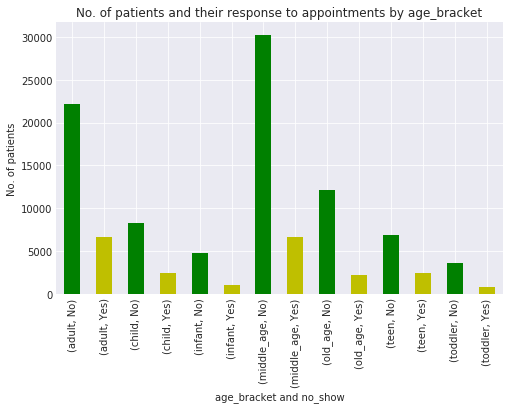

In [31]:
# categorize age brackets accrording to those that showed up and those that didn't

dfx = df.groupby(['age_bracket', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*8, figsize=(8,5))
plt.xlabel('age_bracket and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by age_bracket')

df.groupby(['age_bracket']).count()['patient_id'].sort_values(ascending=False)


### Total number of patients that showed up and those that didn't according to neighborhood

In [32]:
# display number of patients according to neighborhood, top 5

df.groupby('neighborhood').count()['no_show'].sort_values(ascending=False).head(5)

neighborhood
JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: no_show, dtype: int64

In [33]:
# display number of patients that showed up for the appointment acccording to neighborhood, bottom 5

df.groupby(['no_show', 'neighborhood']).count()['patient_id'].sort_values(ascending=False).head(5)

no_show  neighborhood   
No       JARDIM CAMBURI     6252
         MARIA ORTIZ        4586
         RESISTÊNCIA        3525
         JARDIM DA PENHA    3246
         SANTA MARTHA       2635
Name: patient_id, dtype: int64

In [34]:
# display number of patients according to neighborhood. bottom 5

df.groupby('neighborhood').count()['no_show'].sort_values(ascending=False).tail(5)

neighborhood
ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: no_show, dtype: int64

In [35]:
# display number of patients that didn't show up according to neighborhood

df.groupby(['no_show', 'neighborhood']).count()['patient_id'].sort_values(ascending=False).tail(5)

no_show  neighborhood               
Yes      ILHA DO BOI                    3
         ILHAS OCEÂNICAS DE TRINDADE    2
         ILHA DO FRADE                  2
         AEROPORTO                      1
No       PARQUE INDUSTRIAL              1
Name: patient_id, dtype: int64


### Total number of patients that showed up and those that didn't according to scholarship

scholarship
0    99665
1    10861
Name: patient_id, dtype: int64

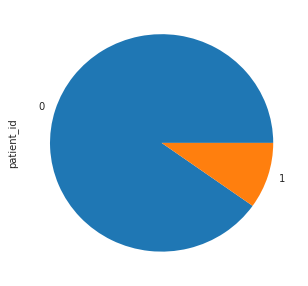

In [36]:
# show distributiion of patients by scholarship

df.groupby(['scholarship']).count()['patient_id'].plot.pie(figsize=(5,5))
df.groupby(['scholarship']).count()['patient_id']

scholarship  no_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: patient_id, dtype: int64

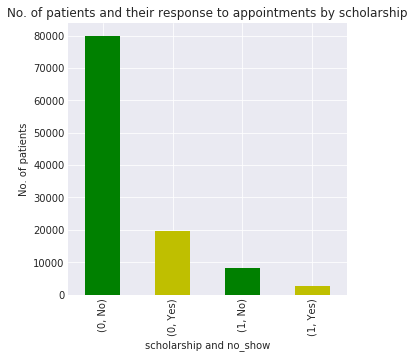

In [37]:
# categorize patients with scholarship accrording to those that showed up and those that didn't

dfx = df.groupby(['scholarship', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*2, figsize=(5,5))
plt.xlabel('scholarship and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by scholarship')

df.groupby(['scholarship', 'no_show']).count()['patient_id']


### Total number of patients that showed up and those that didn't according to health issues

In [38]:
# combine all health issues to make a scale of 4 where:
# 0 = no health issue, 4 =  4 health issues

df['health_issues'] = df['hypertension'] + df['diabetes'] + df['alcoholism'] + df['handicap']
df['health_issues'].head(5)
#on a scale of 4, where 0 is best

0    1
1    0
2    0
3    0
4    2
Name: health_issues, dtype: int64

health_issues
0    84114
1    18123
2     7658
3      618
4       13
Name: patient_id, dtype: int64

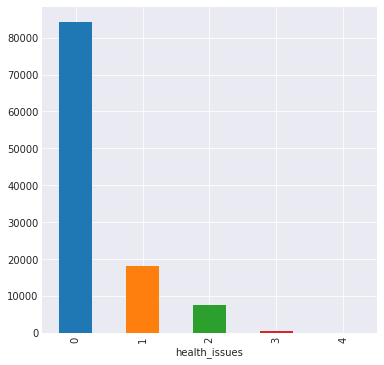

In [39]:
# show distribution of patients according to the number of health issues

df.groupby(['health_issues']).count()['patient_id'].plot.bar(figsize=(6,6))
df.groupby(['health_issues']).count()['patient_id']

In [40]:
df.groupby(['health_issues']).count()['patient_id'].sum()

110526

health_issues  no_show
0              No         66511
               Yes        17603
1              No         14874
               Yes         3249
2              No          6290
               Yes         1368
3              No           523
               Yes           95
4              No             9
               Yes            4
Name: patient_id, dtype: int64

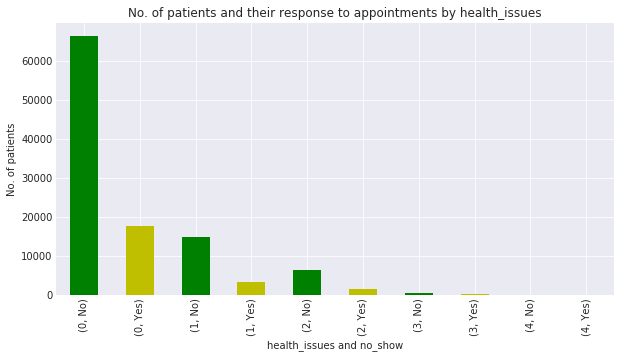

In [41]:
# categorize patients with health issues accrording to those that showed up and those that didn't

dfx = df.groupby(['health_issues', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*4, figsize=(10,5))
plt.xlabel('health_issues and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by health_issues')

df.groupby(['health_issues', 'no_show']).count()['patient_id']


### Total number of patients that showed up and those that didn't according to sms received

sms_received
0    75044
1    35482
Name: patient_id, dtype: int64

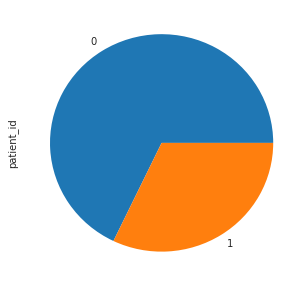

In [42]:
# categorize patients that received sms accrording to those that showed up and those that didn't

df.groupby(['sms_received']).count()['patient_id'].plot.pie(figsize=(5,5))
df.groupby(['sms_received']).count()['patient_id']

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: patient_id, dtype: int64

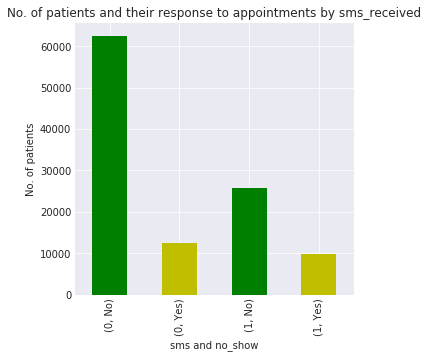

In [43]:
dfx = df.groupby(['sms_received', 'no_show']).count()['patient_id']
dfx.plot(kind='bar', color=['g', 'y']*2, figsize=(5,5))
plt.xlabel('sms and no_show')
plt.ylabel('No. of patients')
plt.title('No. of patients and their response to appointments by sms_received')

df.groupby(['sms_received', 'no_show']).count()['patient_id']

<a id='conclusions'></a>
## Conclusions

### Deductions from statistics and graphs in the EDA section:
Observing all the green (showed up) and yellow (didn't show up) bars across each possible factor that can affect if a patient showed up or not:
1. There is a general trend showing that from the entire data of 110526 patients, 80% of them showed up for their appointment. This average is also true for the total number of patients that showed up for their appointment 'in any given category or sub-category'. Some were even as high as 90%. 
- Directly proportional increase between total number of appointments and number of patients that showed up.
- There is an average percent of turn out regardless of the number of appointment.

2. 79% and 80% of the total number of female and male showed up respectively.

3. The total number of appointment scheduled and confirmed each day were almost same. Tuesday and Wednesday shared the highest, but there is a drastic decline in the number of appointments on Saturday. However, the turn out percentage was still up to average - 76%. 

4. Patients at the age of 0 and 1 had the highest number of appointments. However, considering age brackets, there seem to be a greater number of patients between the age of 40 and 64 with a turn out of 80%.

5. The location Jardim Camburi had the highest number of appointments, hence the highest number of turn out (according to point number 1) - 81% ; Bonfim had the lowest number of appointmnets, hence the lowest turn out - 80%.
- There is still an average turn out rate; the difference is only in the number of appointments.

6. There is no significant preference between those that received SMS or not.
- 76% of those with scholarship showed up, 80% of patients without scholarship showed up

7. On a scale of 4, there is a greater number of patients with lesser number of health issues.
- Patients with 0 health issues are more than and had a greater turn out than those with at least 1 health issues, and so on.

8.  There is no significant preference between those that received SMS or not. 
- 72% of those that received SMS showed up; 83% of those that didn't receive SMS showed up.

#### In general, none of the categories or sub-categories in this dataset can determine the number of patients that will show up for an appointment(%), however, these categories and sub-categories can determine the total number of appointment that will be made or scheduled.

### Limitations:
1. Complex analysis such as using a scatterplot or regression  analysis isn't applicable as most of the data are categorical, thereby limiting: 
- our ability to infer or establish possible correlation between the dependent variable (no_show) and the independent ones.
- combine two independent variables and check them against tthe no_show record to see if more than one condition could predict the turn out of patients.

2. There were multiple corrections made on the dataset that could have affect any of the results displayed in the EDA sectiion.
- We deleted on of the patient record during the analysis. The patient had an age of -1
- One of the health issues (handicap) had a different scale of measurement


In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0